# Advanced Regression - Assignment

##### 
<font color= 'green'>
Description : To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
</font>

In [3565]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error



# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [3566]:
df_sales = pd.read_csv('train.csv')
df_sales.head(5)
df_sales.shape

(1460, 81)

In [3567]:
df_sales.shape
df_sales.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [3568]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

<font color='yellow'>
Data Cleaning : Remove columns with more than 80% blank values.
Remove data with repetative value (same value more than 80%).
Use proper methods like mean , meadian or Mode and fill null values if possible  
</font>

In [3569]:
# Check for number of null values.If the number of null values is greater than 80% remove the field.
# Even if null value is with a purpose(like instaed of 'No'), we need to remove the value since 80% 
# of the value has same value

( df_sales.isnull().sum()/len(df_sales) ).sort_values(ascending=False)
# Remove 'PoolQC', 'MiscFeature', 'Alley', 'Fence' since 80% of values are null
df_sales.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
df_sales

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
5        6          50       RL         85.0    14115   Pave      IR1   
6        7          20       RL         75.0    10084   Pave      Reg   
7        8          60       RL          NaN    10382   Pave      IR1   
8        9          50       RM         51.0     6120   Pave      Reg   
9       10         190       RL         50.0     7420   Pave      Reg   
10      11          20       RL         70.0    11200   Pave      Reg   
11      12          60       RL         85.0    11924   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
13      14          20       RL         91.0    10652   Pave      IR1   
14      15          20       RL          NaN    10920   Pave      IR1   
15      16          45       RM         51.0     6120   Pave      Reg   
16      17          20       RL          NaN    11241   Pave      IR1   
17      18          90       RL         72.0    10791   Pave      Reg   
18      19          20       RL         66.0    13695   Pave      Reg   
19      20          20       RL         70.0     7560   Pave      Reg   
20      21          60       RL        101.0    14215   Pave      IR1   
21      22          45       RM         57.0     7449   Pave      Reg   
22      23          20       RL         75.0     9742   Pave      Reg   
23      24         120       RM         44.0     4224   Pave      Reg   
24      25          20       RL          NaN     8246   Pave      IR1   
25      26          20       RL        110.0    14230   Pave      Reg   
26      27          20       RL         60.0     7200   Pave      Reg   
27      28          20       RL         98.0    11478   Pave      Reg   
28      29          20       RL         47.0    16321   Pave      IR1   
29      30          30       RM         60.0     6324   Pave      IR1   
30      31          70  C (all)         50.0     8500   Pave      Reg   
31      32          20       RL          NaN     8544   Pave      IR1   
32      33          20       RL         85.0    11049   Pave      Reg   
33      34          20       RL         70.0    10552   Pave      IR1   
34      35         120       RL         60.0     7313   Pave      Reg   
35      36          60       RL        108.0    13418   Pave      Reg   
36      37          20       RL        112.0    10859   Pave      Reg   
37      38          20       RL         74.0     8532   Pave      Reg   
38      39          20       RL         68.0     7922   Pave      Reg   
39      40          90       RL         65.0     6040   Pave      Reg   
40      41          20       RL         84.0     8658   Pave      Reg   
41      42          20       RL        115.0    16905   Pave      Reg   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
44      45          20       RL         70.0     7945   Pave      Reg   
45      46         120       RL         61.0     7658   Pave      Reg   
46      47          50       RL         48.0    12822   Pave      IR1   
47      48          20       FV         84.0    11096   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
49      50          20       RL         66.0     7742   Pave      Reg   
50      51          60       RL          NaN    13869   Pave      IR2   
51      52          50       RM         52.0     6240   Pave      Reg   
52      53          90       RM        110.0     8472   Grvl      IR2   
53      54          20       RL         68.0    50271   Pave      

In [3570]:
# Remove ID field as ID wont be relevant
df_sales.drop(['Id'],axis=1,inplace=True)

In [3571]:
# Now we need to find the values with less than 80% null values and fill them with mean /median based on outliers
null_values =  ( df_sales.isnull().sum()/len(df_sales) ).sort_values(ascending=False)
null_values[null_values>0]

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [3572]:
# lets check and fix each of the values which has missing values
# FireplaceQu = Fireplace quality 
# Blank value means no fire place . So we will input some value
df_sales['FireplaceQu'].value_counts()
# For missing values lets give value as NF -> which means 'No Fire Place'
df_sales['FireplaceQu'] = df_sales['FireplaceQu'].fillna('NF')
df_sales['FireplaceQu'].value_counts()


NF    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [3573]:
# LotFrontage -> Linear feet of street connected to property
# Since we have outliers like 140 , 46 , we will use median here
df_sales['LotFrontage'].value_counts()
df_sales['LotFrontage'] = df_sales['LotFrontage'].fillna(df_sales['LotFrontage'].median())
df_sales['LotFrontage'].value_counts()
df_sales['LotFrontage'].isna().sum()


0

In [3574]:
# GarageType = Garage location
# GarageYrBlt  = Year garage was built
# GarageFinish = Interior finish of the garage
# GarageQual   = Garage quality
# GarageCond   = Garage condition
# For all these values NA means, no garage. Sol lets replace these with  NoGarag
for col in ('GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond'):
    print(df_sales[col].value_counts())
# Lets fill nill 'NoGarag' value for missing values Since NA means 'No Garage'
for col in ('GarageType', 'GarageFinish','GarageQual','GarageCond'):
    df_sales[col] = df_sales[col].fillna('NoGarag')
    print(df_sales[col].isna().sum())
#df_sales['GarageType'] = df_sales['GarageType'].fillna('NoGarag')
#df_sales['GarageType'].value_counts()
df_sales['GarageYrBlt'] = df_sales['GarageYrBlt'].fillna(df_sales['GarageYrBlt'].median())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0  

In [3575]:
# BsmtExposure - Refers to walkout or garden level walls
# BsmtFinType2 - Rating of basement finished area (if multiple types)
# BsmtQual     - Evaluates the height of the basement
# BsmtCond     - Evaluates the general condition of the basement
# BsmtFinType1 - Rating of basement finished area
# For all these values NA means, no Basement. Sol lets replace these with  NoBsmnt
for col in ('BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1'):
    print(df_sales[col].value_counts())
    

for col in ('BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1'):
    df_sales[col] = df_sales[col].fillna('NoBsmnt')
    print(df_sales[col].isna().sum())    

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
0
0
0
0
0


In [3576]:
# MasVnrArea - Masonry veneer area in square feet . 
# Since we have outliers we will take median here
df_sales['MasVnrArea'].value_counts()
df_sales['MasVnrArea'] = df_sales['MasVnrArea'].fillna(df_sales['MasVnrArea'].median())
df_sales['MasVnrArea'].isna().sum()


0

In [3577]:
# MasVnrType - Masonry veneer type
# Fill missing values with None
df_sales['MasVnrType'].value_counts()
df_sales['MasVnrType'] = df_sales['MasVnrType'].fillna('None')
df_sales['MasVnrType'].isna().sum()

0

In [3578]:
# Electrical - Electrical system
df_sales['Electrical'].value_counts()
df_sales['Electrical'].isna().sum()
df_sales['Electrical'] = df_sales['Electrical'].fillna(df_sales['Electrical'].mode()[0])
df_sales['Electrical'].isnull().sum()

0

In [3579]:
df_sales.isna().sum()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [3580]:
df_sales.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

<font color= 'yellow'>
##### Now all the missing values issues are solved. Now Data Preparation has to done
</font>

In [3581]:
df_sales.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [3582]:
df_sales.shape
col_1 = df_sales.columns
col_1


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [3583]:
#Remove the columns which have 1 value more than 80%
df_sales.shape
sim_val = []
for col in col_1:
    a = df_sales[col].value_counts()/1460
    for x in a:
        if x > .8:
            print(col,x)
            sim_val.append(col)

print(sim_val)

Street 0.9958904109589041
LandContour 0.897945205479452
Utilities 0.9993150684931507
LandSlope 0.9465753424657535
Condition1 0.863013698630137
Condition2 0.9897260273972602
BldgType 0.8356164383561644
RoofMatl 0.9821917808219178
ExterCond 0.8780821917808219
BsmtCond 0.897945205479452
BsmtFinType2 0.8602739726027397
BsmtFinSF2 0.8856164383561644
Heating 0.9780821917808219
CentralAir 0.934931506849315
Electrical 0.9143835616438356
LowQualFinSF 0.9821917808219178
BsmtHalfBath 0.9438356164383561
KitchenAbvGr 0.9534246575342465
Functional 0.9315068493150684
GarageQual 0.897945205479452
GarageCond 0.9082191780821918
PavedDrive 0.9178082191780822
EnclosedPorch 0.8575342465753425
3SsnPorch 0.9835616438356164
ScreenPorch 0.9205479452054794
PoolArea 0.9952054794520548
MiscVal 0.9643835616438357
SaleType 0.8678082191780822
SaleCondition 0.8205479452054795
['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2'

In [3584]:
print('Street',df_sales['Street'].value_counts())
print('Utilities',df_sales['Utilities'].value_counts())
print('PoolArea',df_sales['PoolArea'].value_counts())
print('Condition2',df_sales['Condition2'].value_counts())
print('RoofMatl',df_sales['RoofMatl'].value_counts())
print('Heating',df_sales['Heating'].value_counts())
print('LowQualFinSF',df_sales['LowQualFinSF'].value_counts())
print('KitchenAbvGr',df_sales['KitchenAbvGr'].value_counts())
print('3SsnPorch',df_sales['3SsnPorch'].value_counts())
print('MiscVal',df_sales['MiscVal'].value_counts())

Street Pave    1454
Grvl       6
Name: Street, dtype: int64
Utilities AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
PoolArea 0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
Condition2 Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
RoofMatl CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Heating GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
LowQualFinSF 0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1

In [3585]:
# Remove the columns which has same value above 95%
#for col in sim_val:
df_sales.drop(sim_val, axis=1,inplace=True)    
df_sales

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0             60       RL         65.0     8450      Reg    Inside   
1             20       RL         80.0     9600      Reg       FR2   
2             60       RL         68.0    11250      IR1    Inside   
3             70       RL         60.0     9550      IR1    Corner   
4             60       RL         84.0    14260      IR1       FR2   
5             50       RL         85.0    14115      IR1    Inside   
6             20       RL         75.0    10084      Reg    Inside   
7             60       RL         69.0    10382      IR1    Corner   
8             50       RM         51.0     6120      Reg    Inside   
9            190       RL         50.0     7420      Reg    Corner   
10            20       RL         70.0    11200      Reg    Inside   
11            60       RL         85.0    11924      IR1    Inside   
12            20       RL         69.0    12968      IR2    Inside   
13            20       RL         91.0    10652      IR1    Inside   
14            20       RL         69.0    10920      IR1    Corner   
15            45       RM         51.0     6120      Reg    Corner   
16            20       RL         69.0    11241      IR1   CulDSac   
17            90       RL         72.0    10791      Reg    Inside   
18            20       RL         66.0    13695      Reg    Inside   
19            20       RL         70.0     7560      Reg    Inside   
20            60       RL        101.0    14215      IR1    Corner   
21            45       RM         57.0     7449      Reg    Inside   
22            20       RL         75.0     9742      Reg    Inside   
23           120       RM         44.0     4224      Reg    Inside   
24            20       RL         69.0     8246      IR1    Inside   
25            20       RL        110.0    14230      Reg    Corner   
26            20       RL         60.0     7200      Reg    Corner   
27            20       RL         98.0    11478      Reg    Inside   
28            20       RL         47.0    16321      IR1   CulDSac   
29            30       RM         60.0     6324      IR1    Inside   
30            70  C (all)         50.0     8500      Reg    Inside   
31            20       RL         69.0     8544      IR1   CulDSac   
32            20       RL         85.0    11049      Reg    Corner   
33            20       RL         70.0    10552      IR1    Inside   
34           120       RL         60.0     7313      Reg    Inside   
35            60       RL        108.0    13418      Reg    Inside   
36            20       RL        112.0    10859      Reg    Corner   
37            20       RL         74.0     8532      Reg    Inside   
38            20       RL         68.0     7922      Reg    Inside   
39            90       RL         65.0     6040      Reg    Inside   
40            20       RL         84.0     8658      Reg    Inside   
41            20       RL        115.0    16905      Reg    Inside   
42            85       RL         69.0     9180      IR1   CulDSac   
43            20       RL         69.0     9200      IR1   CulDSac   
44            20       RL         70.0     7945      Reg    Inside   
45           120       RL         61.0     7658      Reg    Inside   
46            50       RL         48.0    12822      IR1   CulDSac   
47            20       FV         84.0    11096      Reg    Inside   
48           190       RM         33.0     4456      Reg    Inside   
49            20       RL         66.0     7742      Reg    Inside   
50            60       RL         69.0    13869      IR2    Corner   
51            50       RM         52.0     6240      Reg    Inside   
52            90       RM        110.0     8472      IR2    Corner   
53            20       RL         68.0    50271      IR1    Inside   
54            80       RL         60.0     7134      Reg    Inside   
55            20       RL        100.0    10175      IR1    Inside   
56           160

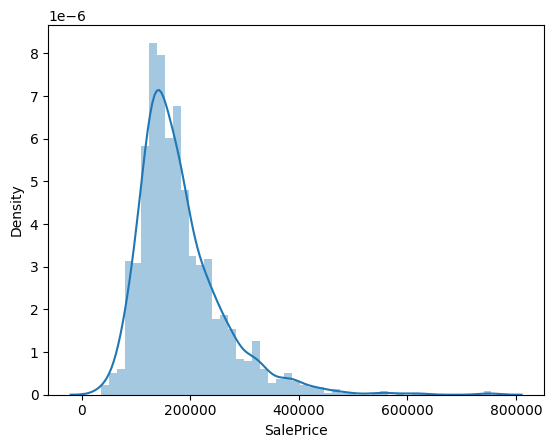

In [3586]:

plt.figure()
sns.distplot(df_sales['SalePrice'])
plt.show()

In [3587]:
df_sales.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

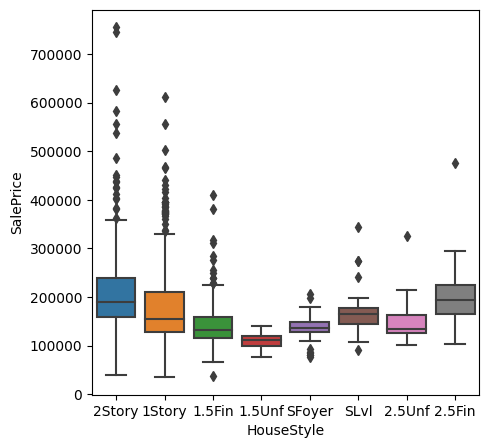

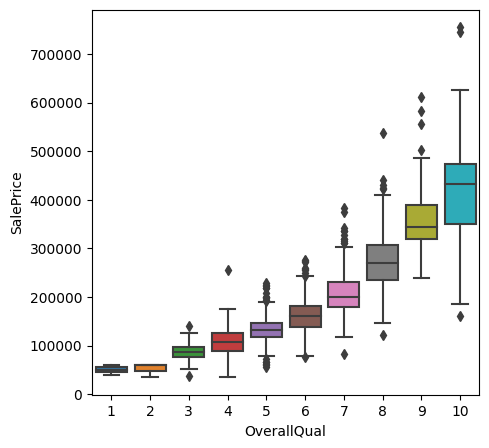

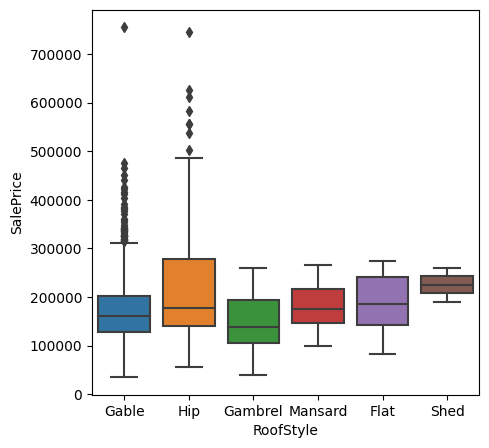

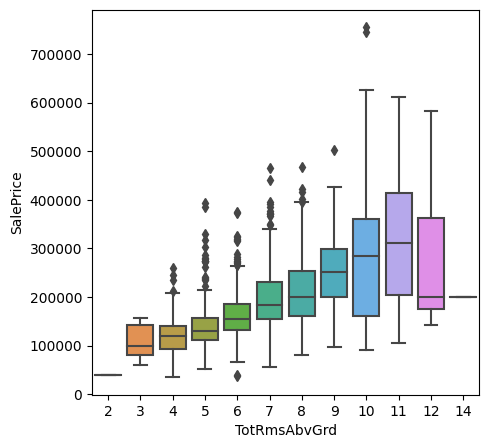

In [3588]:
plt.figure(figsize=(5,5))
sns.boxplot(x='HouseStyle', y='SalePrice', data=df_sales)

plt.figure(figsize=(5,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_sales)

plt.figure(figsize=(5,5))
sns.boxplot(x='RoofStyle', y='SalePrice', data=df_sales)

plt.figure(figsize=(5,5))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df_sales)

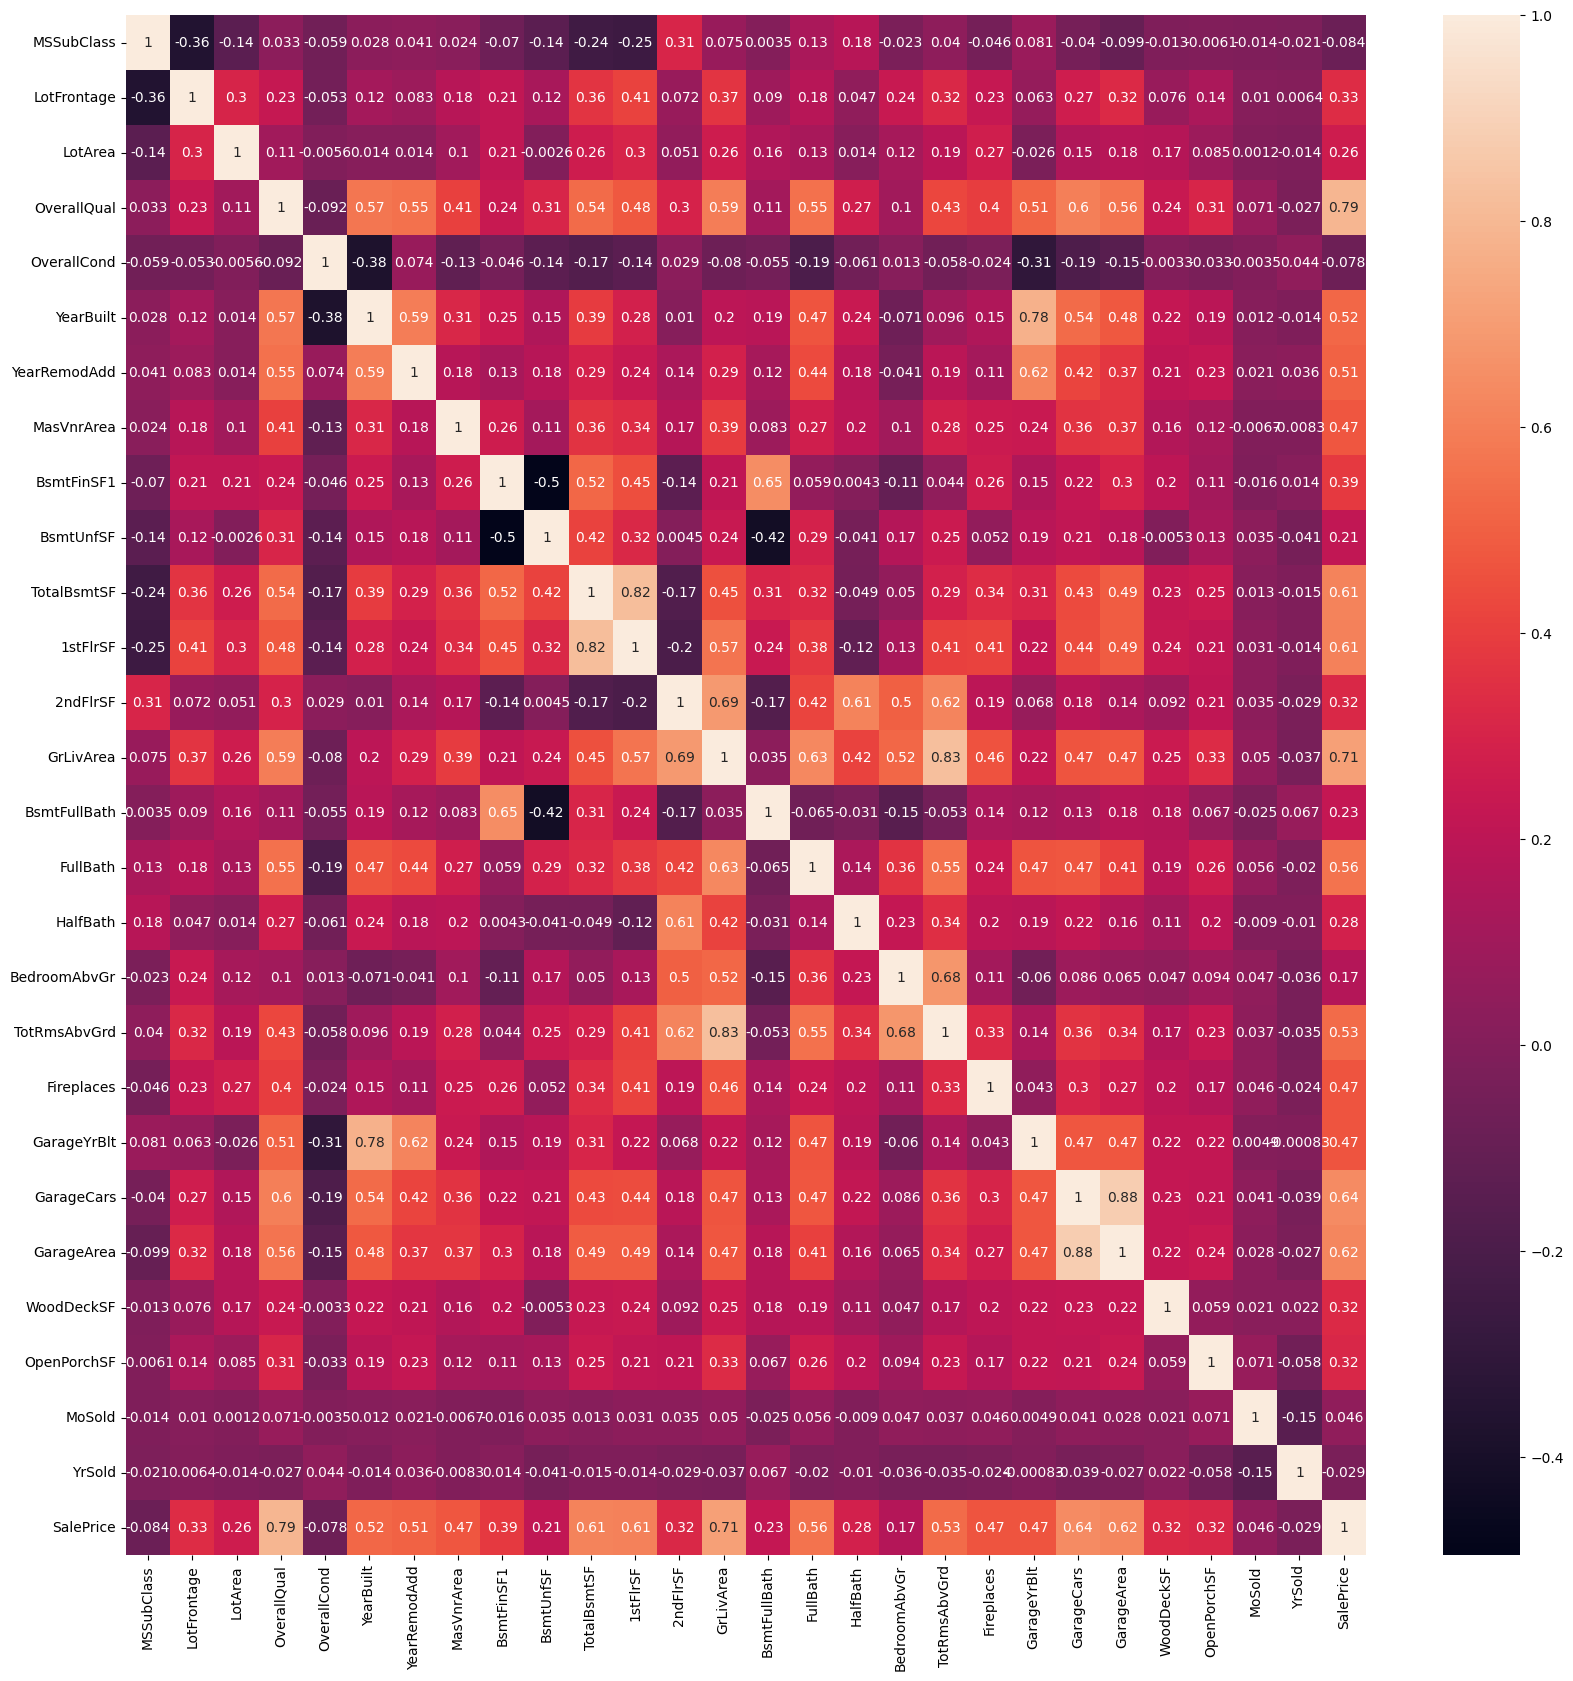

In [3589]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_sales.corr(), annot = True)
plt.show()

## Data Preparation

<font color='yellow'>
##### Deal with Categorical variables and derive columns if needes like yearbuilt.
##### Adding Dummies for Categorical variables
</font>

In [3590]:
# Variable Derived
# Since we have year build, we will check how many years old the building is
# For that we will use current year - YearBuilt
# for Garage year built also we will use same formula 
cur_yr = datetime.datetime.now().year  
cur_yr
df_sales['Old_Yr']  = cur_yr - df_sales['YearBuilt']
df_sales['Old_Yr']
# now drop year built
df_sales.drop('YearBuilt',axis=1,inplace=True)
df_sales['Old_Yr_Garage'] = cur_yr - df_sales['GarageYrBlt']

df_sales.drop('GarageYrBlt',axis=1,inplace=True)
df_sales.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'Old_Yr',
       'Old_Yr_Garage'],
      dtype='object')

In [3591]:
df_sales.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SalePrice        0
Old_Yr           0
Old_Yr_Garage    0
dtype: int64

In [3592]:
# creating dummy variables for categorical variables
# Get all the categorical variables
cat_vars = df_sales.select_dtypes(include=['object'])
cat_vars

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle  \
0          RL      Reg    Inside      CollgCr     2Story     Gable   
1          RL      Reg       FR2      Veenker     1Story     Gable   
2          RL      IR1    Inside      CollgCr     2Story     Gable   
3          RL      IR1    Corner      Crawfor     2Story     Gable   
4          RL      IR1       FR2      NoRidge     2Story     Gable   
5          RL      IR1    Inside      Mitchel     1.5Fin     Gable   
6          RL      Reg    Inside      Somerst     1Story     Gable   
7          RL      IR1    Corner       NWAmes     2Story     Gable   
8          RM      Reg    Inside      OldTown     1.5Fin     Gable   
9          RL      Reg    Corner      BrkSide     1.5Unf     Gable   
10         RL      Reg    Inside       Sawyer     1Story       Hip   
11         RL      IR1    Inside      NridgHt     2Story       Hip   
12         RL      IR2    Inside       Sawyer     1Story       Hip   
13         RL      IR1    Inside      CollgCr     1Story     Gable   
14         RL      IR1    Corner        NAmes     1Story       Hip   
15         RM      Reg    Corner      BrkSide     1.5Unf     Gable   
16         RL      IR1   CulDSac        NAmes     1Story     Gable   
17         RL      Reg    Inside       Sawyer     1Story     Gable   
18         RL      Reg    Inside      SawyerW     1Story     Gable   
19         RL      Reg    Inside        NAmes     1Story       Hip   
20         RL      IR1    Corner      NridgHt     2Story     Gable   
21         RM      Reg    Inside       IDOTRR     1.5Unf     Gable   
22         RL      Reg    Inside      CollgCr     1Story       Hip   
23         RM      Reg    Inside      MeadowV     1Story     Gable   
24         RL      IR1    Inside       Sawyer     1Story     Gable   
25         RL      Reg    Corner      NridgHt     1Story     Gable   
26         RL      Reg    Corner        NAmes     1Story     Gable   
27         RL      Reg    Inside      NridgHt     1Story     Gable   
28         RL      IR1   CulDSac        NAmes     1Story     Gable   
29         RM      IR1    Inside      BrkSide     1Story     Gable   
30    C (all)      Reg    Inside       IDOTRR     2Story   Gambrel   
31         RL      IR1   CulDSac       Sawyer     1Story     Gable   
32         RL      Reg    Corner      CollgCr     1Story     Gable   
33         RL      IR1    Inside        NAmes     1Story       Hip   
34         RL      Reg    Inside      NridgHt     1Story       Hip   
35         RL      Reg    Inside      NridgHt     2Story     Gable   
36         RL      Reg    Corner      CollgCr     1Story     Gable   
37         RL      Reg    Inside        NAmes     1Story       Hip   
38         RL      Reg    Inside        NAmes     1Story     Gable   
39         RL      Reg    Inside      Edwards     1Story     Gable   
40         RL      Reg    Inside        NAmes     1Story     Gable   
41         RL      Reg    Inside       Timber     1Story     Gable   
42         RL      IR1   CulDSac      SawyerW     SFoyer     Gable   
43         RL      IR1   CulDSac      CollgCr     1Story       Hip   
44         RL      Reg    Inside        NAmes     1Story     Gable   
45         RL      Reg    Inside      NridgHt     1Story       Hip   
46         RL      IR1   CulDSac      Mitchel     1.5Fin     Gable   
47         FV      Reg    Inside      Somerst     1Story     Gable   
48         RM      Reg    Inside      OldTown     2Story     Gable   
49         RL      Reg    Inside       Sawyer     1Story     Gable   
50         RL      IR2    Corner      Gilbert     2Story     Gable   
51         RM      Reg    Inside      BrkSide     1.5Fin     Gable   
52         RM      IR2    Corner       IDOTRR     1Story     Gable   
53         RL      IR1    Inside      Veenker     1Story     Gable   
54         RL      Reg    Inside        NAmes       SLvl     Gable   
55         RL      IR1    Inside        NAmes     1Story     Gable   
56         FV  

In [3593]:
# Get Dummies for categorical variables
cat_dummies = pd.get_dummies(cat_vars,drop_first=True)
cat_dummies

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0               0            0            1            0             0   
1               0            0            1            0             0   
2               0            0            1            0             0   
3               0            0            1            0             0   
4               0            0            1            0             0   
5               0            0            1            0             0   
6               0            0            1            0             0   
7               0            0            1            0             0   
8               0            0            0            1             0   
9               0            0            1            0             0   
10              0            0            1            0             0   
11              0            0            1            0             0   
12              0            0            1            0             1   
13              0            0            1            0             0   
14              0            0            1            0             0   
15              0            0            0            1             0   
16              0            0            1            0             0   
17              0            0            1            0             0   
18              0            0            1            0             0   
19              0            0            1            0             0   
20              0            0            1            0             0   
21              0            0            0            1             0   
22              0            0            1            0             0   
23              0            0            0            1             0   
24              0            0            1            0             0   
25              0            0            1            0             0   
26              0            0            1            0             0   
27              0            0            1            0             0   
28              0            0            1            0             0   
29              0            0            0            1             0   
30              0            0            0            0             0   
31              0            0            1            0             0   
32              0            0            1            0             0   
33              0            0            1            0             0   
34              0            0            1            0             0   
35              0            0            1            0             0   
36              0            0            1            0             0   
37              0            0            1            0             0   
38              0            0            1            0             0   
39              0            0            1            0             0   
40              0            0            1            0             0   
41              0            0            1            0             0   
42              0            0            1            0             0   
43              0            0            1            0             0   
44              0            0            1            0             0   
45              0            0            1            0             0   
46              0            0            1            0             0   
47              1            0            0            0             0   
48              0            0            0            1             0   
49              0            0            1            0             0   
50              0            0            1            0             1   
51              0            0            0            1             0   
52              0            0            0            1             1   
53        

In [3594]:
# Drop the variables used for categorical dummie and concat the dummies to dataset
df_sales = df_sales.drop(list(cat_vars.columns),axis=1)
df_sales = pd.concat([df_sales,cat_dummies],axis=1)
df_sales.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
3          70         60.0     9550            7            5          1970   
4          60         84.0    14260            8            5          2000   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  FireplaceQu_TA  \
0       196.0         706        150          856  ...               0   
1         0.0         978        284         1262  ...               1   
2       162.0         486        434          920  ...               1   
3         0.0         216        540          756  ...               0   
4       350.0         655        490         1145  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NoGarag  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   
3                   0                  1                   0   
4                   0                  0                   0   

   GarageFinish_NoGarag  GarageFinish_RFn  GarageFinish_Unf  
0                     0                 1                 0  
1                     0                 1                 0  
2                     0                 1                 0  
3                     0                 0                 1  
4                     0                 1                 0  

[5 rows x 150 columns]

In [3595]:
df_sales.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NoGarag', 'GarageFinish_NoGarag', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=150)

## Model Building

<font color='yellow'>
steps:
  1. Build Model with RFE
  2. Build Model using Ridge on Orginal data
  3. Build Model using Lasso on Orginal data
  4. Build Model using Ridge on features selected by RFE
  5. Build Model using Lasso on features selected by RFE
  For analysis Build Model using Ridge on features selected by RFE and Build Model using Lasso on features selected by 
  RFE will be used.
</font>

## Feature Selection using RFE


##### Since we have too many feature, we will select important 40 features using RFE and then use lasso and Ridge on that

In [3596]:
y = df_sales.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [3597]:
X = df_sales
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
3          70         60.0     9550            7            5          1970   
4          60         84.0    14260            8            5          2000   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  FireplaceQu_TA  \
0       196.0         706        150          856  ...               0   
1         0.0         978        284         1262  ...               1   
2       162.0         486        434          920  ...               1   
3         0.0         216        540          756  ...               0   
4       350.0         655        490         1145  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NoGarag  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   
3                   0                  1                   0   
4                   0                  0                   0   

   GarageFinish_NoGarag  GarageFinish_RFn  GarageFinish_Unf  
0                     0                 1                 0  
1                     0                 1                 0  
2                     0                 1                 0  
3                     0                 0                 1  
4                     0                 1                 0  

[5 rows x 149 columns]

In [3598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)
X_train.head()
y_train.head()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(978, 149)
(978,)
(482, 149)
(482,)


### Scaling 


In [3599]:
# Using Minmax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars_sc = X_train.select_dtypes(exclude=['object']).columns
num_vars_sc
# All variables are numerical. Sol lets do min max scaling


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NoGarag', 'GarageFinish_NoGarag', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=149)

In [3600]:
# Scaling 
X_train[num_vars_sc] = scaler.fit_transform(X_train[num_vars_sc])
X_train
# test should be only transformed based on train
#X_test_sc = scaler.transform(X_test)

X_test[num_vars_sc] = scaler.transform(X_test[num_vars_sc])
X_test
X_train.shape

(978, 149)

In [3601]:
X_train.describe()
X_test.describe()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(978, 149)
(978,)
(482, 149)
(482,)


### RFE

In [3602]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=40)
rfe = rfe.fit(X_train,y_train)


In [3603]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'Old_Yr', 'LotShape_IR3', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'RoofStyle_Mansard', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_NoBsmnt', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NoGarag', 'GarageFinish_NoGarag'],
      dtype='object')

In [3604]:
y_train_pred = rfe.predict(X_train)
print(y_train_pred.shape)
y_test_pred = rfe.predict(X_test)
print(y_test_pred.shape)

(978,)
(482,)


In [3605]:
r2_rfe_test  = r2_score(y_test,y_test_pred)
r2_rfe_test
r2_rfe_train = r2_score(y_train,y_train_pred)
r2_rfe_train



# r2_rfe_train and r2_rfe_test are 87 and 86. It is acceptable

0.863283390445471

In [3606]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)


0.863283390445471
0.8490933815375904
775089367701.7607
533990710707.44775
792524915.8504711
1107864545.0361986


#### Since we have shortlisted the features using RFE , we will now use Ridge and Lasso to build the model

In [3607]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge

In [3608]:
# We will give below list of Alpha's for hypertuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    
        
model_cv_ridge.fit(X_train, y_train) 

print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 5.0}
-19427.527453539355


In [3609]:
model_cv_ridge.best_params_['alpha']

5.0

In [3610]:
# Optimum value of Alpha is 5
alpha = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.55243853e+04 -8.16002907e+03  2.44016760e+04  6.11757532e+04
  2.54969101e+04  1.24951783e+04  1.56629796e+04  3.72557069e+03
  1.02983127e+04  1.06688129e+04  1.93524633e+04  4.04867520e+04
  3.20396445e+04  2.37101354e+04  2.72375051e+04  1.37474669e+04
  1.04734932e+04  4.10027312e+04  1.72253748e+04  3.67551184e+04
  2.12468429e+04  1.26273140e+04 -8.57867478e+02  4.80575416e+02
 -1.27253404e+03 -5.21902034e+03 -1.38214168e+03  1.08592923e+04
 -2.11724482e+03  4.28712688e+03 -2.03099504e+03  1.16297950e+04
 -1.41927722e+04  8.75252281e+02  1.28506328e+04 -9.58625311e+03
 -8.95755378e+03  3.64807414e+02 -1.42037764e+03  2.18643165e+03
  3.89004922e+01  4.26456975e+02 -4.34206123e+03  2.07558243e+04
 -1.96944946e+04 -7.32330453e+03 -9.46927083e+03 -9.23859976e+03
 -1.10716855e+04 -1.33164242e+04  1.17788277e+03 -7.99232207e+03
  3.52037892e+04  2.62165416e+04 -8.26374652e+03 -1.06623597e+04
 -9.24140516e+03 -2.30205071e+03  4.76596947e+03  4.13868465e+04
  2.59606299e+02  8.86708

In [3611]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8765856580648977
0.8487465819284472
699674637686.6139
535217878684.8788
715413739.9658629
1110410536.69062


## Lasso

In [3612]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3613]:
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 100}
-19500.900022860533


In [3614]:
# Fitting the Lasso Model with Alpha = 100
alpha = model_cv_lasso.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_



array([-38086.50291061,  -5630.77939825,  42147.09469514, 101114.06358178,
        25696.85346715,  11245.51927562,   8605.95225285,      0.        ,
         2662.25727378,      0.        ,      0.        ,  33578.80182838,
        65045.94701667,  24382.77003495,  25408.95644883,  11595.10085455,
            0.        ,  54308.67626777,  18157.87945239,  50133.49090841,
         2818.02445608,  10718.18765319,     -0.        ,      0.        ,
           -0.        ,  -1288.37448426,  -2193.31909675,  12310.80960095,
           -0.        ,   3501.63566654,     -0.        ,   8854.63792693,
       -13211.2333097 ,    406.04909738,  11735.03168405,  -6601.8421114 ,
           -0.        ,    331.20871005,     -0.        ,      0.        ,
          782.19647851,      0.        ,      0.        ,  21798.80792481,
       -13220.24996549,  -1718.7652488 ,  -5780.68636858,     -0.        ,
        -4223.68305379,  -8896.24732418,      0.        ,  -3708.5593914 ,
        42426.012642  ,  

In [3615]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.875949981420881
0.8532494189343254
703278488086.9353
519284361934.79913
719098658.5755985
1077353447.9975085


### Now lets do Lasso and Ridge with the selected cofficients from RFE

In [3616]:

X_train1 = X_train[rfe_col]
print(X_train1.shape)
X_test1 = X_test[rfe_col]
print(X_test1.shape)

(978, 40)
(482, 40)


In [3617]:
model_cv_ridge.fit(X_train1, y_train) 
model_cv_ridge.best_params_['alpha']

Fitting 5 folds for each of 28 candidates, totalling 140 fits


0.5

### Ridge using Feature Selection from RFE

In [3618]:
alpha = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train1, y_train)
print(ridge.coef_)

[-44453.85861044 -51830.48392054  96670.0777648  104691.92870469
  43144.23772362  47160.73460927  30278.78856079  84691.87119127
  36794.89500492  23629.32666026  40740.59922745  62998.41156469
 -42364.06835071 -27135.82761969 -19652.00765254  32370.75370776
  49763.72477267  32525.0535356   54201.28705899  18845.30662389
 -14237.22502635  28224.10713499  10291.22734069  12147.28427527
 -28106.4549795  -38350.85789976 -32586.76743803 -35899.68516172
  27097.20519984 -44363.2463223  -29282.50627668 -31042.35854127
 -39794.29178544  26392.5265483   24911.28622847  25182.09364244
  14703.02949374  20302.26654361  15782.51148086  15782.51148086]


In [3619]:
y_pred_train_ridge = ridge.predict(X_train1)
y_pred_test_ridge  = ridge.predict(X_test1)


y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8618818081112226
0.8518800558773849
783035377837.4297
524129922450.5845
800649670.5904189
1087406478.1132457


### Lasso using Feature Selection from RFE

In [3620]:
model_cv_lasso.fit(X_train1, y_train) 
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 10.0}
-19402.960284338435


In [3621]:
alpha = model_cv_lasso.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 
lasso.coef_


array([-44857.49796435, -59990.26973875, 114662.28499029, 106948.49312164,
        44300.5852881 ,     -0.        ,   8751.1857825 , 154390.05472686,
        35862.1190571 ,  21432.16395337,  36592.46474886,  63254.66530464,
       -44399.13241153, -29732.53747825, -19383.73989218,  32415.58539902,
        49745.88157736,  32450.40401347,  54308.62407091,  18700.47579644,
        -4634.55969028,  27471.4887966 ,   3347.14617067,   5134.35512203,
       -26676.34009827, -37941.48380433, -32834.10062861, -35825.02534372,
        26047.53497387, -44354.14017895, -28139.68058652, -30434.64839198,
       -38751.0720769 ,  27385.23358969,  26746.99535324,  26742.05371637,
        16238.81853063,  21495.94519095,  33223.23546785,      0.        ])

In [3622]:
y_pred_train_Lasso = lasso.predict(X_train1)
y_pred_test_Lasso = lasso.predict(X_test1)

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric5 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric5.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric5.append(r2_test_lasso)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8624925679309553
0.8531821609033599
779572788734.0519
519522357883.035
797109190.9346133
1077847215.5249689


##### Lasso again eliminated few columns from RFE but now r2_score of test and train is more accurate.

In [3623]:
print("RFE :",  metric1)
print("Ridge:", metric2)
print("Lasso:" , metric3)
print("RFE with Ridge:", metric4)
print("RFE with Lasso:" ,metric5)

RFE : [0.863283390445471, 0.8490933815375904, 775089367701.7607, 533990710707.44775, 28151.819050471164, 33284.59921699822]
Ridge: [0.8765856580648977, 0.8487465819284472, 699674637686.6139, 535217878684.8788, 26747.219294084814, 33322.823060038296]
Lasso: [0.875949981420881, 0.8532494189343254, 703278488086.9353, 519284361934.79913, 26816.014964487145, 32823.062745537754]
RFE with Ridge: [0.8618818081112226, 0.8518800558773849, 783035377837.4297, 524129922450.5845, 28295.753578769003, 32975.84689000793]
RFE with Lasso: [0.8624925679309553, 0.8531821609033599, 779572788734.0519, 519522357883.035, 28233.12223142551, 32830.58353920882]


<font color= 'yellow'>
### R2 Score of Lasso is greater than others for testset and that too after elimination using RFE , R2 score of test seta and train set is more similar. Also few features from RFE is again eliminated in Lasso
</font>

## Model Evaluation

<font color='yellow'>
##### For Model evaluation we will take the model which is created after doing RFE
</font>

#### Ridge

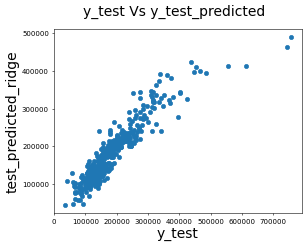

In [3624]:

fig = plt.figure(dpi=50)
plt.scatter(y_test,y_pred_test_ridge)
fig.suptitle('y_test Vs y_test_predicted', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('test_predicted_ridge',fontsize=20)  
plt.show()

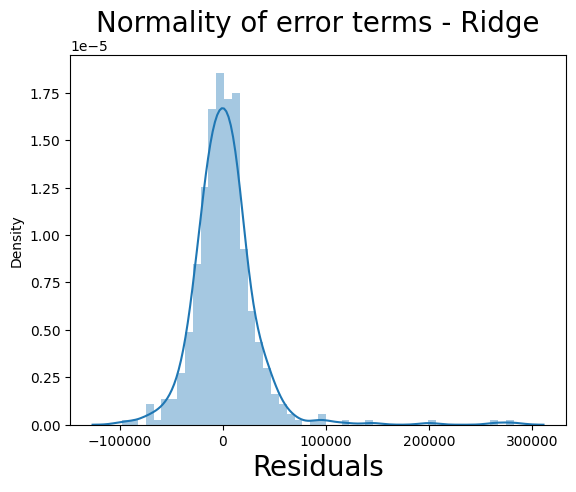

In [3625]:
# Check Normality of error - Ridge
y_residuals_ridge =y_test-y_pred_test_ridge
# Distribution of errors
sns.distplot(y_residuals_ridge,kde=True)
plt.title('Normality of error terms - Ridge',fontsize=20)
plt.xlabel("Residuals",fontsize=20)
plt.show()

### Lasso

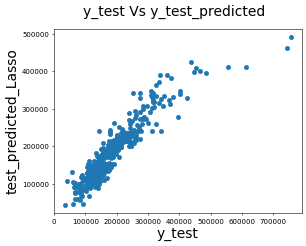

In [3626]:
fig = plt.figure(dpi=50)
plt.scatter(y_test,y_pred_test_Lasso)
fig.suptitle('y_test Vs y_test_predicted', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('test_predicted_Lasso',fontsize=20)  
plt.show()

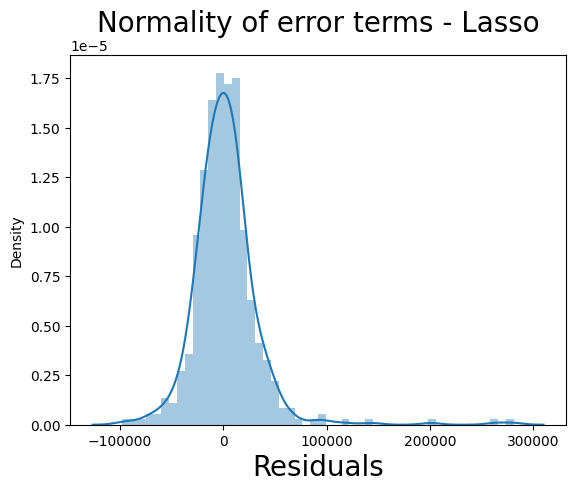

In [3627]:
# Check Normality of error - Lasso
y_residuals_Lasso =y_test-y_pred_test_Lasso
# Distribution of errors
sns.distplot(y_residuals_Lasso,kde=True)
plt.title('Normality of error terms - Lasso',fontsize=20)
plt.xlabel("Residuals",fontsize=20)
plt.show()

<font color='yellow'>
#### Our assumption are satisfied :
#####   There is a linear relationship between X and Y
#####   The assumption of normality , as it has been observed that the error terms generally follow a normal distribution with mean equal to 0.
#####   The error terms should not be dependent upon one another
#####   Error terms have constant variance (homoscedasticity)
</font>

### check the changes in the coefficients after regularization

In [3628]:
beta_values = pd.DataFrame(index=X_train1.columns)
beta_values.rows = X_train1.columns
beta_values['Ridge'] = ridge.coef_
beta_values['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
beta_values.head(100)


Ridge          Lasso
MSSubClass            -44453.858610  -44857.497964
LotFrontage           -51830.483921  -59990.269739
LotArea                96670.077765  114662.284990
OverallQual           104691.928705  106948.493122
OverallCond            43144.237724   44300.585288
1stFlrSF               47160.734609      -0.000000
2ndFlrSF               30278.788561    8751.185783
GrLivArea              84691.871191  154390.054727
BsmtFullBath           36794.895005   35862.119057
FullBath               23629.326660   21432.163953
TotRmsAbvGrd           40740.599227   36592.464749
GarageCars             62998.411565   63254.665305
Old_Yr                -42364.068351  -44399.132412
LotShape_IR3          -27135.827620  -29732.537478
LotConfig_FR3         -19652.007653  -19383.739892
Neighborhood_Crawfor   32370.753708   32415.585399
Neighborhood_NoRidge   49763.724773   49745.881577
Neighborhood_NridgHt   32525.053536   32450.404013
Neighborhood_StoneBr   54201.287059   54308.624071
RoofStyle_Mansard      18845.306624   18700.475796
Exterior1st_AsphShn   -14237.225026   -4634.559690
Exterior1st_BrkFace    28224.107135   27471.488797
Exterior1st_Stone      10291.227341    3347.146171
Exterior2nd_AsphShn    12147.284275    5134.355122
Exterior2nd_Stone     -28106.454979  -26676.340098
BsmtQual_Fa           -38350.857900  -37941.483804
BsmtQual_Gd           -32586.767438  -32834.100629
BsmtQual_TA           -35899.685162  -35825.025344
BsmtExposure_Gd        27097.205200   26047.534974
BsmtFinType1_NoBsmnt  -44363.246322  -44354.140179
KitchenQual_Fa        -29282.506277  -28139.680587
KitchenQual_Gd        -31042.358541  -30434.648392
KitchenQual_TA        -39794.291785  -38751.072077
GarageType_Attchd      26392.526548   27385.233590
GarageType_Basment     24911.286228   26746.995353
GarageType_BuiltIn     25182.093642   26742.053716
GarageType_CarPort     14703.029494   16238.818531
GarageType_Detchd      20302.266544   21495.945191
GarageType_NoGarag     15782.511481   33223.235468
GarageFinish_NoGarag   15782.511481       0.000000

<font color = 'yellow'>
### Which variables are significant in predicting the price of a house

1. GrLivArea              - Above grade (ground) living area square feet
2. OverallQual            - Rates the overall material and finish of the house
3. LotArea                - Lot size in square feet
4. GarageCars             - Size of garage in car capacity
5. OverallCond            - Rates the overall condition of the house
6. Old_Yr                 - derived variable from when the house is build
7. MSSubClass             - Identifies the type of dwelling involved in the sale
8. GarageCExterior1stars  - Exterior covering on house
9. Neighborhood_StoneBr   - Physical locations within Ames city limits
10. Neighborhood_NoRidge  - Physical locations within Ames city limits
11. TotRmsAbvGrd          - Total rooms above grade
12. BsmtFullBath          - Basement full bathrooms
13. LotFrontage           - Linear feet of street connected to property
14. FullBath              - Full bathrooms above grade
15. 2ndFlrSF              - Second floor square feet
</font>

### How well those variables describe the price of a house

<font color='yellow'>
#### r2_Score
#### Ridge ->  train - 0.85
####           test  - 0.84

#### Lasso ->  train - .857
####           test  - .857

#### Test set and train set have almost similar r2_score and the training of model is good enough to predict the data
#### The contribution of each feature is given in below which shows what is the Beta parameter for each feature.
</font>

In [3629]:
print("Ridge with RFE :" , metric4)
print("Lasso with RFE :" , metric5)

Ridge with RFE : [0.8618818081112226, 0.8518800558773849, 783035377837.4297, 524129922450.5845, 28295.753578769003, 32975.84689000793]
Lasso with RFE : [0.8624925679309553, 0.8531821609033599, 779572788734.0519, 519522357883.035, 28233.12223142551, 32830.58353920882]


In [3630]:
pd.set_option('display.max_rows', None)
beta_values.head(40)

Ridge          Lasso
MSSubClass            -44453.858610  -44857.497964
LotFrontage           -51830.483921  -59990.269739
LotArea                96670.077765  114662.284990
OverallQual           104691.928705  106948.493122
OverallCond            43144.237724   44300.585288
1stFlrSF               47160.734609      -0.000000
2ndFlrSF               30278.788561    8751.185783
GrLivArea              84691.871191  154390.054727
BsmtFullBath           36794.895005   35862.119057
FullBath               23629.326660   21432.163953
TotRmsAbvGrd           40740.599227   36592.464749
GarageCars             62998.411565   63254.665305
Old_Yr                -42364.068351  -44399.132412
LotShape_IR3          -27135.827620  -29732.537478
LotConfig_FR3         -19652.007653  -19383.739892
Neighborhood_Crawfor   32370.753708   32415.585399
Neighborhood_NoRidge   49763.724773   49745.881577
Neighborhood_NridgHt   32525.053536   32450.404013
Neighborhood_StoneBr   54201.287059   54308.624071
RoofStyle_Mansard      18845.306624   18700.475796
Exterior1st_AsphShn   -14237.225026   -4634.559690
Exterior1st_BrkFace    28224.107135   27471.488797
Exterior1st_Stone      10291.227341    3347.146171
Exterior2nd_AsphShn    12147.284275    5134.355122
Exterior2nd_Stone     -28106.454979  -26676.340098
BsmtQual_Fa           -38350.857900  -37941.483804
BsmtQual_Gd           -32586.767438  -32834.100629
BsmtQual_TA           -35899.685162  -35825.025344
BsmtExposure_Gd        27097.205200   26047.534974
BsmtFinType1_NoBsmnt  -44363.246322  -44354.140179
KitchenQual_Fa        -29282.506277  -28139.680587
KitchenQual_Gd        -31042.358541  -30434.648392
KitchenQual_TA        -39794.291785  -38751.072077
GarageType_Attchd      26392.526548   27385.233590
GarageType_Basment     24911.286228   26746.995353
GarageType_BuiltIn     25182.093642   26742.053716
GarageType_CarPort     14703.029494   16238.818531
GarageType_Detchd      20302.266544   21495.945191
GarageType_NoGarag     15782.511481   33223.235468
GarageFinish_NoGarag   15782.511481       0.000000

## Problem Statement - Part II

### 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Ridge

In [3631]:
alpha_ridge2 = model_cv_ridge.best_params_['alpha']
# Double the value
alpha_ridge2 = alpha_ridge2 * 2
alpha_ridge2 

1.0

In [3632]:
ridge_2 = Ridge(alpha=alpha_ridge2)

ridge_2.fit(X_train1, y_train)
print(ridge_2.coef_)


[-43729.01718319 -43512.32899168  81346.16783432 102795.00653196
  41907.88974957  51965.33321093  33131.63344127  72696.41552998
  36983.33333521  24557.90652231  42000.67406095  61713.69057855
 -41058.1101345  -24361.93905051 -17252.14311438  31871.15754985
  49326.50323826  32603.28577681  53497.99224789  16630.85925461
  -8669.00127875  28120.16530521   5635.08333015   8181.62742873
 -23107.18122768 -37556.75222315 -31876.37918922 -35466.5852215
  27813.65546865 -43549.91188267 -29832.15434693 -31116.99682621
 -40385.40115836  19881.22451836  17324.70304481  18610.90769421
   7151.12090843  13372.26712215  11800.13152543  11800.13152543]


In [3633]:
y_pred_train = ridge_2.predict(X_train1)
y_pred_test = ridge_2.predict(X_test1)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.8608581820463095
0.8510939432712745
788838635261.6865
526911621712.7512
806583471.6377163
1093177638.4081976


#### Lasso

In [3634]:
# Double Alpha
alpha_lasso2 = model_cv_lasso.best_params_['alpha']
alpha_lasso2 = alpha_lasso2 * 2
lasso_2 = Lasso(alpha=alpha_lasso2)
        
lasso_2.fit(X_train1, y_train) 
lasso_2.coef_

array([-44413.69476311, -55869.0039031 , 109903.2632088 , 108339.50650434,
        44240.64514601,     -0.        ,   8769.52521592, 153655.82958976,
        35626.29092329,  20645.34576817,  36628.74608833,  61142.17829742,
       -44142.13130247, -28403.13976855, -16134.44028903,  31425.66296607,
        49455.27707071,  32394.42681158,  53948.60094759,  15526.50412397,
           -0.        ,  27156.90419922,      0.        ,      0.        ,
       -21284.56199385, -37215.52640157, -32418.30588462, -35680.34848395,
        26070.31174267, -43550.36752008, -27713.79464447, -30037.7187133 ,
       -38564.72179545,  12256.01842169,  10549.26745262,  11661.52387312,
            0.        ,   6247.60127277,  17005.01966191,      0.        ])

In [3635]:
y_pred_train = lasso_2.predict(X_train1)
y_pred_test = lasso_2.predict(X_test1)

metric7 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric7.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric7.append(r2_test_lasso)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric7.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric7.append(mse_test_lr**0.5)

0.8618084367141384
0.8536054961357373
783451343314.9137
518024364727.3469
801074993.1645334
1074739345.9073586


In [3636]:
# Print all r2 score , MSE after Alpha doubled

print("Ridge_1: " , metric4)
print("Ridge_Double: " , metric6)
print("Lasso_1: " , metric5)
print("Lasso_Souble: " , metric7)


Ridge_1:  [0.8618818081112226, 0.8518800558773849, 783035377837.4297, 524129922450.5845, 28295.753578769003, 32975.84689000793]
Ridge_Double:  [0.8608581820463095, 0.8510939432712745, 788838635261.6865, 526911621712.7512, 28400.413230052065, 33063.236962042865]
Lasso_1:  [0.8624925679309553, 0.8531821609033599, 779572788734.0519, 519522357883.035, 28233.12223142551, 32830.58353920882]
Lasso_Souble:  [0.8618084367141384, 0.8536054961357373, 783451343314.9137, 518024364727.3469, 28303.2682417514, 32783.21744288316]


In [3637]:
# Beta Values

beta_values = pd.DataFrame(index=X_train1.columns)
beta_values.rows = X_train1.columns

beta_values['Ridge'] = ridge.coef_
beta_values['Ridge_Double'] = ridge_2.coef_
beta_values['Lasso'] = lasso.coef_
beta_values['Lasso_Double'] = lasso_2.coef_
pd.set_option('display.max_rows', None)
beta_values.head(100)

Ridge   Ridge_Double          Lasso  \
MSSubClass            -44453.858610  -43729.017183  -44857.497964   
LotFrontage           -51830.483921  -43512.328992  -59990.269739   
LotArea                96670.077765   81346.167834  114662.284990   
OverallQual           104691.928705  102795.006532  106948.493122   
OverallCond            43144.237724   41907.889750   44300.585288   
1stFlrSF               47160.734609   51965.333211      -0.000000   
2ndFlrSF               30278.788561   33131.633441    8751.185783   
GrLivArea              84691.871191   72696.415530  154390.054727   
BsmtFullBath           36794.895005   36983.333335   35862.119057   
FullBath               23629.326660   24557.906522   21432.163953   
TotRmsAbvGrd           40740.599227   42000.674061   36592.464749   
GarageCars             62998.411565   61713.690579   63254.665305   
Old_Yr                -42364.068351  -41058.110134  -44399.132412   
LotShape_IR3          -27135.827620  -24361.939051  -29732.537478   
LotConfig_FR3         -19652.007653  -17252.143114  -19383.739892   
Neighborhood_Crawfor   32370.753708   31871.157550   32415.585399   
Neighborhood_NoRidge   49763.724773   49326.503238   49745.881577   
Neighborhood_NridgHt   32525.053536   32603.285777   32450.404013   
Neighborhood_StoneBr   54201.287059   53497.992248   54308.624071   
RoofStyle_Mansard      18845.306624   16630.859255   18700.475796   
Exterior1st_AsphShn   -14237.225026   -8669.001279   -4634.559690   
Exterior1st_BrkFace    28224.107135   28120.165305   27471.488797   
Exterior1st_Stone      10291.227341    5635.083330    3347.146171   
Exterior2nd_AsphShn    12147.284275    8181.627429    5134.355122   
Exterior2nd_Stone     -28106.454979  -23107.181228  -26676.340098   
BsmtQual_Fa           -38350.857900  -37556.752223  -37941.483804   
BsmtQual_Gd           -32586.767438  -31876.379189  -32834.100629   
BsmtQual_TA           -35899.685162  -35466.585221  -35825.025344   
BsmtExposure_Gd        27097.205200   27813.655469   26047.534974   
BsmtFinType1_NoBsmnt  -44363.246322  -43549.911883  -44354.140179   
KitchenQual_Fa        -29282.506277  -29832.154347  -28139.680587   
KitchenQual_Gd        -31042.358541  -31116.996826  -30434.648392   
KitchenQual_TA        -39794.291785  -40385.401158  -38751.072077   
GarageType_Attchd      26392.526548   19881.224518   27385.233590   
GarageType_Basment     24911.286228   17324.703045   26746.995353   
GarageType_BuiltIn     25182.093642   18610.907694   26742.053716   
GarageType_CarPort     14703.029494    7151.120908   16238.818531   
GarageType_Detchd      20302.266544   13372.267122   21495.945191   
GarageType_NoGarag     15782.511481   11800.131525   33223.235468   
GarageFinish_NoGarag   15782.511481   11800.131525       0.000000   

                       Lasso_Double  
MSSubClass            -44413.694763  
LotFrontage           -55869.003903  
LotArea               109903.263209  
OverallQual           108339.506504  
OverallCond            44240.645146  
1stFlrSF                  -0.000000  
2ndFlrSF                8769.525216  
GrLivArea             153655.829590  
BsmtFullBath           35626.290923  
FullBath               20645.345768  
TotRmsAbvGrd           36628.746088  
GarageCars             61142.178297  
Old_Yr                -44142.131302  
LotShape_IR3          -28403.139769  
LotConfig_FR3         -16134.440289  
Neighborhood_Crawfor   31425.662966  
Neighborhood_NoRidge   49455.277071  
Neighborhood_NridgHt   32394.426812  
Neighborhood_StoneBr   53948.600948  
RoofStyle_Mansard      15526.504124  
Exterior1st_AsphShn       -0.000000  
Exterior1st_BrkFace    27156.904199  
Exterior1st_Stone          0.000000  
Exterior2nd_AsphShn        0.000000  
Exterior2nd_Stone     -21284.561994  
BsmtQual_Fa           -37215.526402  
BsmtQual_Gd           -32418.305885  
BsmtQual_TA           -35680.348484  
BsmtExposure_Gd        26070.311743  
BsmtFinType1_NoBsmnt  -43550.367520  
KitchenQual_Fa        

<font color= 'yellow'>
#### r2_Score has slightly increased after we changed Alpha to double.
#### Feature contributing remains mostly same. BUt the Coefficient values has changed.
#### Important Predictor variables :
##### GrLivArea              - Above grade (ground) living area square feet
##### OverallQual            - Rates the overall material and finish of the house
##### LotArea                - Lot size in square feet
##### GarageCars             - Size of garage in car capacity
##### OverallCond            - Rates the overall condition of the house
##### Old_Yr                 - derived variable from when the house is build
##### MSSubClass             - Identifies the type of dwelling involved in the sale
##### GarageCExterior1stars  - Exterior covering on house
##### Neighborhood_StoneBr   - Physical locations within Ames city limits
##### Neighborhood_NoRidge  - Physical locations within Ames city limits
##### TotRmsAbvGrd          - Total rooms above grade
##### BsmtFullBath          - Basement full bathrooms
##### FullBath              - Full bathrooms above grade
##### 2ndFlrSF              - Second floor square feet
</font>

### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [3638]:
# Since we are using X_train1 and X_test1 from rfe to create Ridge and Lasso models. 
# we need to remove top 5 columns from these datasets.
X_train2 = X_train1.drop(['GrLivArea','OverallQual','LotArea','OverallCond','Old_Yr'],axis=1)
X_train2.head()

MSSubClass  LotFrontage  1stFlrSF  2ndFlrSF  BsmtFullBath  FullBath  \
615     0.382353     0.202055  0.165213       0.0      0.333333  0.333333   
613     0.000000     0.167808  0.180358       0.0      0.000000  0.333333   
1303    0.000000     0.178082  0.294172       0.0      0.000000  0.666667   
486     0.000000     0.198630  0.169573       0.0      0.333333  0.333333   
561     0.000000     0.191781  0.242084       0.0      0.333333  0.333333   

      TotRmsAbvGrd  GarageCars  LotShape_IR3  LotConfig_FR3  ...  \
615       0.333333        0.50           0.0            0.0  ...   
613       0.333333        0.00           0.0            0.0  ...   
1303      0.416667        0.75           0.0            0.0  ...   
486       0.333333        0.50           0.0            0.0  ...   
561       0.333333        0.50           0.0            0.0  ...   

      KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  GarageType_Attchd  \
615              0.0             1.0             0.0                1.0   
613              0.0             0.0             1.0                0.0   
1303             0.0             1.0             0.0                1.0   
486              0.0             0.0             1.0                1.0   
561              0.0             0.0             1.0                1.0   

      GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
615                  0.0                 0.0                 0.0   
613                  0.0                 0.0                 0.0   
1303                 0.0                 0.0                 0.0   
486                  0.0                 0.0                 0.0   
561                  0.0                 0.0                 0.0   

      GarageType_Detchd  GarageType_NoGarag  GarageFinish_NoGarag  
615                 0.0                 0.0                   0.0  
613                 0.0                 1.0                   1.0  
1303                0.0                 0.0                   0.0  
486                 0.0                 0.0                   0.0  
561                 0.0                 0.0                   0.0  

[5 rows x 35 columns]

In [3639]:
X_test2 = X_test1.drop(['GrLivArea','OverallQual','LotArea','OverallCond','Old_Yr'],axis=1)
X_test2.head()
X_test2.shape

(482, 35)

#### Ridge

In [3640]:
model_cv_ridge.fit(X_train2, y_train)
print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}
-22264.801926865643


In [3641]:
alpha2 = model_cv_ridge.best_params_['alpha']
ridge2 = Ridge(alpha=alpha2)

ridge2.fit(X_train2, y_train)
print(ridge2.coef_)

[-46819.600789   -57894.90258515 153414.7565334   70733.37910405
  37627.21964151  36492.30489654  35680.73022898  81949.27391132
 -12713.05362991 -15976.63868363  39030.43166754  54078.88280773
  37267.75847591  60582.90796035  18270.95384999 -32413.9585876
  28657.37277473  14646.52423717  39090.31668465 -44575.57724092
 -64738.23275548 -37323.11338566 -49556.28142369  32304.32196771
 -72555.54876971 -58832.18627455 -41318.43655253 -59519.97194504
  68451.40206242  66582.84543736  65734.78812092  40387.48771435
  55865.61021931  33871.78231873  33871.78231911]


In [3642]:
y_pred_train = ridge2.predict(X_train2)
y_pred_test = ridge2.predict(X_test2)

metric8 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric8.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric8.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric8.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric8.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric8.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric8.append(mse_test_lr**0.5)

0.8332447224614179
0.8306311159060611
945388004057.8401
599320372496.3094
966654400.8771371
1243403262.440476


#### Lasso

In [3643]:
model_cv_lasso.fit(X_train2, y_train) 
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 8.0}
-22259.858023810462


In [3644]:
alpha2 = model_cv_lasso.best_params_['alpha']

lasso2 = Lasso(alpha=alpha2)
        
lasso2.fit(X_train2, y_train) 
lasso2.coef_


array([-46386.56719328, -54595.67916707, 152371.09906606,  70497.0006589 ,
        37151.69165908,  35766.10509863,  35472.02903986,  80219.42956678,
       -12147.51658119, -13304.71435477,  38437.54144588,  54027.31621603,
        37193.5480708 ,  60356.0033383 ,  15858.9431288 ,  -7538.52157709,
        28158.35770139,      0.        ,  22560.15564372, -36168.54739486,
       -64227.54344036, -37074.70661922, -49508.01761793,  32189.77542129,
       -72561.82622042, -58892.96916271, -41328.54181081, -59814.64255812,
        55660.3512387 ,  52918.46732041,  53198.80140838,  26188.50876368,
        42877.25682445,  53819.37423325,      0.        ])

In [3645]:
y_pred_train = lasso2.predict(X_train2)
y_pred_test = lasso2.predict(X_test2)

metric9 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric9.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric9.append(r2_test_lasso)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric9.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric9.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric9.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric9.append(mse_test_lr**0.5)

0.83302616553002
0.8316457276348408
946627071895.4353
595730117518.3401
967921341.4063755
1235954600.6604567


#### Compare Coefficients and r2_score

In [3646]:
print("Ridge_1: " , metric4)
print("Ridge_2: " , metric8)
print("Lasso_1: " , metric5)
print("Lasso_2: " , metric9)

Ridge_1:  [0.8618818081112226, 0.8518800558773849, 783035377837.4297, 524129922450.5845, 28295.753578769003, 32975.84689000793]
Ridge_2:  [0.8332447224614179, 0.8306311159060611, 945388004057.8401, 599320372496.3094, 31091.066255069753, 35261.92369171705]
Lasso_1:  [0.8624925679309553, 0.8531821609033599, 779572788734.0519, 519522357883.035, 28233.12223142551, 32830.58353920882]
Lasso_2:  [0.83302616553002, 0.8316457276348408, 946627071895.4353, 595730117518.3401, 31111.434255051237, 35156.14598701707]


In [3647]:
beta_values = pd.DataFrame(index=X_train2.columns)
beta_values.rows = X_train2.columns

beta_values['Ridge_2'] = ridge2.coef_
beta_values['Lasso_2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
beta_values.head(100)

Ridge_2        Lasso_2
MSSubClass            -46819.600789  -46386.567193
LotFrontage           -57894.902585  -54595.679167
1stFlrSF              153414.756533  152371.099066
2ndFlrSF               70733.379104   70497.000659
BsmtFullBath           37627.219642   37151.691659
FullBath               36492.304897   35766.105099
TotRmsAbvGrd           35680.730229   35472.029040
GarageCars             81949.273911   80219.429567
LotShape_IR3          -12713.053630  -12147.516581
LotConfig_FR3         -15976.638684  -13304.714355
Neighborhood_Crawfor   39030.431668   38437.541446
Neighborhood_NoRidge   54078.882808   54027.316216
Neighborhood_NridgHt   37267.758476   37193.548071
Neighborhood_StoneBr   60582.907960   60356.003338
RoofStyle_Mansard      18270.953850   15858.943129
Exterior1st_AsphShn   -32413.958588   -7538.521577
Exterior1st_BrkFace    28657.372775   28158.357701
Exterior1st_Stone      14646.524237       0.000000
Exterior2nd_AsphShn    39090.316685   22560.155644
Exterior2nd_Stone     -44575.577241  -36168.547395
BsmtQual_Fa           -64738.232755  -64227.543440
BsmtQual_Gd           -37323.113386  -37074.706619
BsmtQual_TA           -49556.281424  -49508.017618
BsmtExposure_Gd        32304.321968   32189.775421
BsmtFinType1_NoBsmnt  -72555.548770  -72561.826220
KitchenQual_Fa        -58832.186275  -58892.969163
KitchenQual_Gd        -41318.436553  -41328.541811
KitchenQual_TA        -59519.971945  -59814.642558
GarageType_Attchd      68451.402062   55660.351239
GarageType_Basment     66582.845437   52918.467320
GarageType_BuiltIn     65734.788121   53198.801408
GarageType_CarPort     40387.487714   26188.508764
GarageType_Detchd      55865.610219   42877.256824
GarageType_NoGarag     33871.782319   53819.374233
GarageFinish_NoGarag   33871.782319       0.000000

### Observations
<font color='yellow'>
#### Alpha values has changed
#### r2_score has decreased
#### Next Five Important features
##### - 1stFlrSF      - First Floor square feet             
##### - 2ndFlrSF      - Second floor square feet
##### - TotRmsAbvGrd  - Total rooms above grade
##### - GarageCars    - Size of garage in car capacity/Type          
##### - BsmtQual_Fa   - Basement Quality 
</font>        